## Using regionmask

We will now have a look on how to select regions from a netcdf file by using the **regionmask** package.

In [1]:
import regionmask as rg

After importing the package, let us see first what regions are predefined.

First, we have country regions from Natural Earth (we can identify them by country code):

<GeoAxesSubplot: >

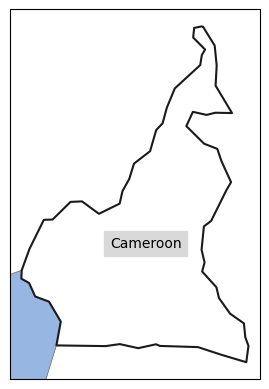

In [2]:
cameroon = rg.defined_regions.natural_earth_v5_0_0.countries_110[['CM']]
cameroon.plot(label='name', add_ocean=True)

Then, we have masks for Scientific regions, for example from the AR6 report:

<GeoAxesSubplot: >

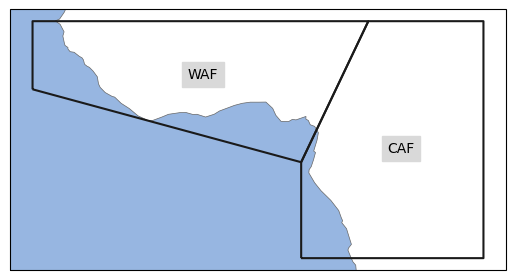

In [3]:
rg.defined_regions.ar6.all[['WAF','CAF']].plot(label='abbrev', add_ocean=True)

or, you can use any shapefile to create a mask:

In [4]:
import geopandas as gp
cmr_regions = gp.read_file('CMR1.shp')

In [5]:
cmr_regions

ISO    NAME_0        NAME_1                VARNAME_1    TYPE_1 HASC_1  \
0  CMR  Cameroon      Adamaoua  Adamoua|Adamaua|Adamawa  Province  CM.AD   
1  CMR  Cameroon        Centre                  Central  Province  CM.CE   
2  CMR  Cameroon           Est                     East  Province  CM.ES   
3  CMR  Cameroon  Extrême-Nord            Extreme-North  Province  CM.EN   
4  CMR  Cameroon      Littoral                  Litoral  Province  CM.LT   
5  CMR  Cameroon          Nord                    North  Province  CM.NO   
6  CMR  Cameroon    Nord-Ouest               North-West  Province  CM.NW   
7  CMR  Cameroon         Ouest                     West  Province  CM.OU   
8  CMR  Cameroon           Sud                    South  Province  CM.SU   
9  CMR  Cameroon     Sud-Ouest               South-West  Province  CM.SW   

                                            geometry  
0  POLYGON ((12.36164 7.94353, 12.40752 7.92755, ...  
1  POLYGON ((11.99788 6.17796, 12.07062 6.16565, ...  
2  POLYGON ((14.42192 6.03182, 14.43063 6.02076, ...  
3  POLYGON ((14.16768 13.07726, 14.17941 13.07705...  
4  MULTIPOLYGON (((9.63469 3.60798, 9.63279 3.606...  
5  POLYGON ((13.63726 10.20214, 13.68609 10.19340...  
6  POLYGON ((10.63696 7.04997, 10.65492 7.04450, ...  
7  POLYGON ((11.22653 6.26476, 11.20452 6.22190, ...  
8  POLYGON ((12.48132 3.38323, 12.49927 3.35454, ...  
9  MULTIPOLYGON (((8.54259 4.66832, 8.53159 4.665...

In [6]:
import numpy as np

resolution = 0.05 #degrees
lon = np.arange(cameroon.bounds[0][0],cameroon.bounds[0][2]+resolution,resolution)
lat = np.arange(cameroon.bounds[0][1],cameroon.bounds[0][3]+resolution,resolution)

mask = rg.mask_geopandas(cmr_regions,lon,lat)
mask

<xarray.DataArray 'mask' (lat: 224, lon: 152)>
array([[nan, nan, nan, ..., nan, nan,  2.],
       [nan, nan, nan, ...,  2.,  2.,  2.],
       [nan, nan, nan, ...,  2.,  2.,  2.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 1.728 1.778 1.828 1.878 ... 12.73 12.78 12.83 12.88
  * lon      (lon) float64 8.489 8.539 8.589 8.639 ... 15.89 15.94 15.99 16.04

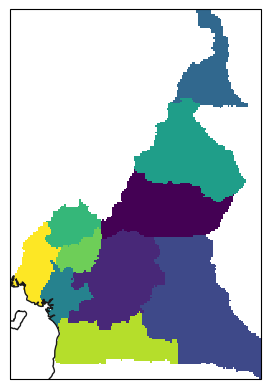

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

f, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
mask.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    add_colorbar=False,
)

ax.coastlines(color="0.1");

In [8]:
# Just take l'Ouest

ouest = cmr_regions[cmr_regions.NAME_1=='Ouest']
ouest

ISO    NAME_0 NAME_1 VARNAME_1    TYPE_1 HASC_1  \
7  CMR  Cameroon  Ouest      West  Province  CM.OU   

                                            geometry  
7  POLYGON ((11.22653 6.26476, 11.20452 6.22190, ...

In [9]:
mask = rg.mask_geopandas(ouest,lon,lat)
mask

<xarray.DataArray 'mask' (lat: 224, lon: 152)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 1.728 1.778 1.828 1.878 ... 12.73 12.78 12.83 12.88
  * lon      (lon) float64 8.489 8.539 8.589 8.639 ... 15.89 15.94 15.99 16.04

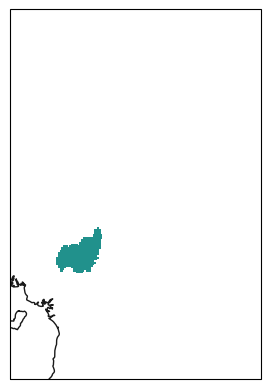

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

f, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
mask.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    add_colorbar=False,
)

ax.coastlines(color="0.1");

Let us now do the average from a netCDF file data over the selected region.

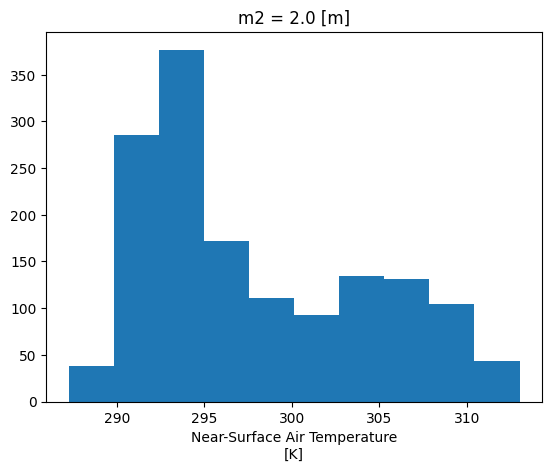

In [38]:
import xarray as xr
from pathlib import Path

datadir = str(Path.home())+'/testrun/output/'
ds = xr.open_mfdataset(datadir+'*_SRF.*.nc')

mask = rg.mask_geopandas(ouest,ds.xlon,ds.xlat)
masked = ds.tas.where(mask==7).mean(('m2','iy','jx'))

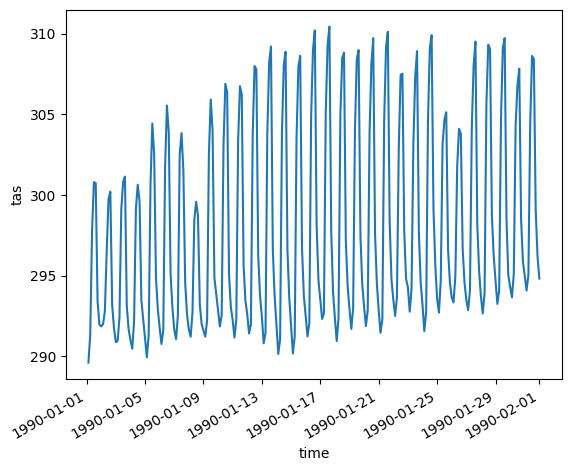

In [35]:
masked.plot( )